In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [3]:
df = pd.read_csv("ObesityData.csv")

In [4]:
df=df.drop(columns=['Height','Weight'])
print(df.shape)

(2111, 15)


In [5]:
df[df.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [6]:
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')


# # prompt: what is benefit of converting object/text variables to category variables

# * **Reduced memory usage**: Category variables require less memory to store than object variables, as they store only the category labels rather than the full strings.
# * **Improved performance**: Category variables can improve the performance of some statistical operations, such as filtering and grouping, as they allow for more efficient comparisons.
# * **Enhanced data visualization**: Category variables can be used to create more informative and visually appealing plots, as they allow for the use of categorical color palettes and other categorical-specific visualization techniques.
# * **Easier data manipulation**: Category variables can be more easily manipulated than object variables, as they provide a number of built-in methods for handling categorical data, such as renaming categories, merging categories, and filtering by category.

# Here is an example of how converting an object variable to a category variable can reduce memory usage:



In [7]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [8]:
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int32   
 5   NCP                             2111 non-null   int32   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int32   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int32   
 11  TUE                             2111 non-null   int32   
 12  CALC                

C:\Users\itsme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\itsme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\itsme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

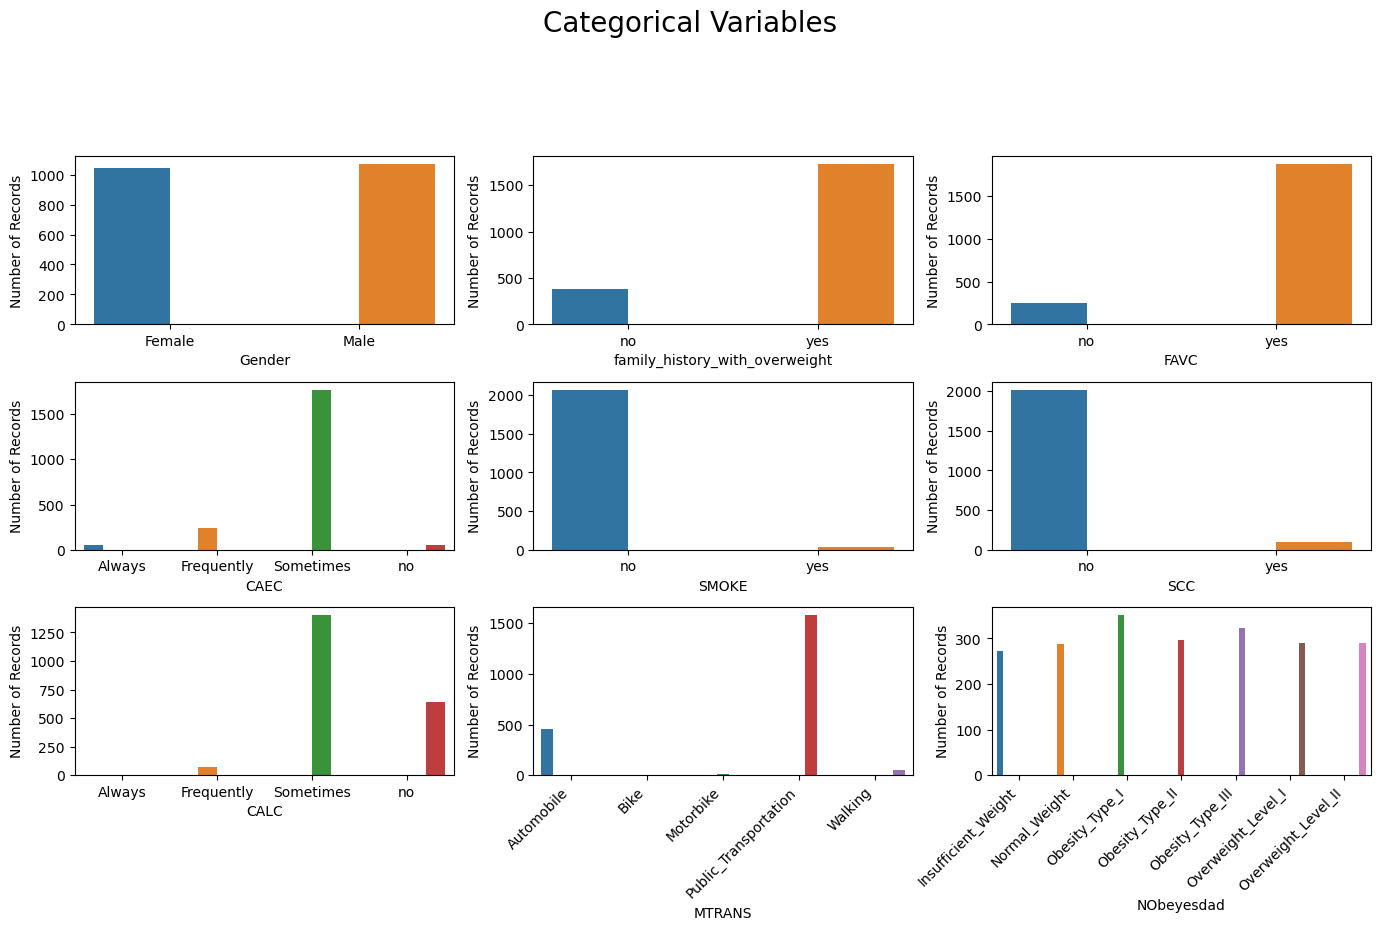

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))  # Adjust the number of rows and columns here
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(x=df[col], hue=df[col], ax=subplot)  # Assign category to hue

    if col in ["MTRANS", "NObeyesdad"]:  # Rotate x-axis labels for specific variables
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    subplot.yaxis.label.set_text("Number of Records")
    
    # Remove legend
    subplot.legend().remove()

# Show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()
